In [1]:
!python3.9 -m pip install quadprog --user
try:
    import quadprog
    print("Quadprog imported successfully!")
except ModuleNotFoundError:
    print("Quadprog not found.")


Quadprog imported successfully!


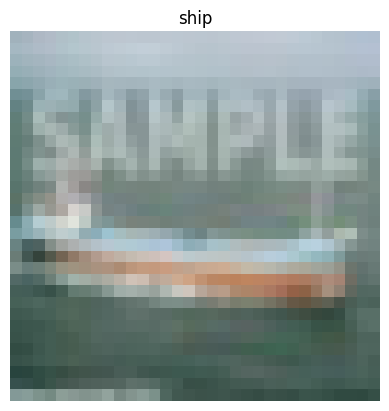

In [2]:
import unlearnGEM.gems as gems
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from copy import deepcopy

# NOTE : if you want to incorporate PRETRAINING using a task with more classes OR switch to GEM you must change the corresponding 
#       global parameters in the gems.py code.
 

In [3]:
# all these names need to be extracted from gems file and into args file but can do at a later date 

# gems.PRETRAIN = 0
# gems.N_TASKS = 5
n_inputs = gems.N_INPUTS
n_outputs = gems.N_OUTPUTS
n_tasks = gems.N_TASKS
args = gems.Args()
model = gems.Net(n_inputs, n_outputs, n_tasks, args)
if args.cuda:
    model.cuda()
model.is_cifar = True


random.shuffle(gems.SHUFFLEDCLASSES)
# size of all tasks
print(gems.SIZE_OF_TASKS)
# amount of classes pretrained on (i.e. task 1 of variable size) 
print(gems.PRETRAIN)
# order of classes to be trained on
print(gems.SHUFFLEDCLASSES)
print(gems.N_TASKS)


# for task in range(n_tasks):
#     print('Task', task)
#     # set the task
#     model , test_accuracies = gems.train_next_task(args, model)
    

2
0
['cat', 'bird', 'deer', 'automobile', 'horse', 'frog', 'ship', 'truck', 'dog', 'airplane']
5


new ordering of classes:  ['cat', 'bird', 'deer', 'automobile', 'horse', 'frog', 'ship', 'truck', 'dog', 'airplane']
Training task:  1
Epoch:  0
Accuracy:  0.6196
Epoch:  1
Accuracy:  0.6391
Epoch:  2
Accuracy:  0.683
Epoch:  3
Accuracy:  0.7146
Epoch:  4
Accuracy:  0.7155
Epoch:  5
Accuracy:  0.7309
Epoch:  6
Accuracy:  0.7381
Epoch:  7
Accuracy:  0.7288
Epoch:  8
Accuracy:  0.7713
Epoch:  9
Accuracy:  0.7444
Testing task:  1
Accuracy:  0.7345
Testing task:  2
Accuracy:  0.454
Testing task:  3
Accuracy:  0.425
Testing task:  4
Accuracy:  0.5
Testing task:  5
Accuracy:  0.5
[0.7345, 0.454, 0.425, 0.5, 0.5]
new ordering of classes:  ['cat', 'bird', 'deer', 'automobile', 'horse', 'frog', 'ship', 'truck', 'dog', 'airplane']
Training task:  2
Epoch:  0
Accuracy:  0.7343
Epoch:  1
Accuracy:  0.8708
Testing task:  1
Accuracy:  0.6575
Testing task:  2
Accuracy:  0.8835
Testing task:  3
Accuracy:  0.352
Testing task:  4
Accuracy:  0.5
Testing task:  5
Accuracy:  0.5
[0.6575, 0.8835, 0.352, 0.5

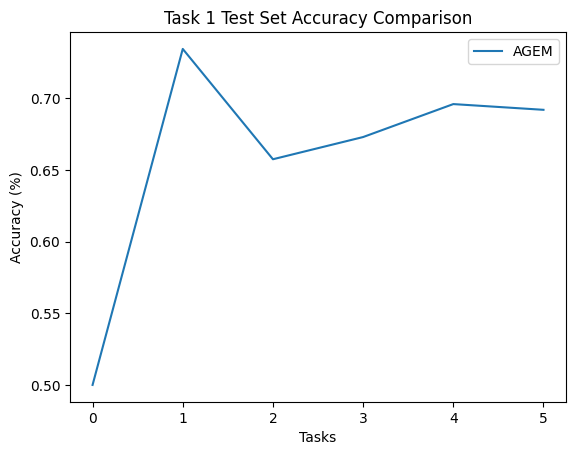

In [4]:
test_accuracies_AGEM_all = []
# gems.AGEM = True
# gems.CURR_TASK = 1
models = [None]*(n_tasks+1)
models[0] = model

# Run each task seperately and store the test accuracies for each task
for i in range(1, n_tasks+1):
    models[i], test_accuracies_AGEM = gems.train_next_task(gems.Args(), deepcopy(models[i-1]), i)
    print(test_accuracies_AGEM)
    test_accuracies_AGEM_all.extend(test_accuracies_AGEM)

# Plot the test accuracies for Task 1 only after each iteration.
task_1_accuracies_AGEM = []
task_1_accuracies_AGEM.append(0.5)
for i in range(0, len(test_accuracies_AGEM_all), n_tasks):
    task_1_accuracies_AGEM.append(test_accuracies_AGEM_all[i])

plt.plot(task_1_accuracies_AGEM, label='AGEM')
plt.title('Task 1 Test Set Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Tasks')
plt.legend()
plt.show()

# model , test_accuracies_AGEM = gems.run_cifar(gems.Args())
# task_1_accuracies_AGEM = []
# task_1_accuracies_AGEM.append(0.5)
# for i in range(0, len(test_accuracies_AGEM_all), n_tasks):
#     task_1_accuracies_AGEM.append(test_accuracies_AGEM_all[i])

# plt.plot(task_1_accuracies_AGEM, label='AGEM')
# plt.title('Task 1 Test Set Accuracy Comparison')
# plt.ylabel('Accuracy (%)')
# plt.xlabel('Tasks')
# plt.legend()
# plt.show()


# UNLEARNING

In [5]:
from cifar import load_cifar10_data

DATASET_PATH = 'cifar-10-batches-py' 
train_data, train_labels, test_data, test_labels = load_cifar10_data(DATASET_PATH)
oldClasstoNewClass = {}
for i in range(len(gems.SHUFFLEDCLASSES)):
    oldClasstoNewClass[i] = gems.SHUFFLEDCLASSES.index(gems.CLASSES[i])
for i in range(len(train_labels)):
    train_labels[i] = oldClasstoNewClass[train_labels[i]]
for i in range(len(test_labels)):
    test_labels[i] = oldClasstoNewClass[test_labels[i]]

/dcs/21/u2110391/CS407/Machine-Unlearning-x-Continual-Learning/Unlearning
/dcs/21/u2110391/CS407/Machine-Unlearning-x-Continual-Learning
new ordering of classes:  ['cat', 'bird', 'deer', 'automobile', 'horse', 'frog', 'ship', 'truck', 'dog', 'airplane']
Training task:  1
Epoch:  0
Accuracy:  0.6223
Epoch:  1
Accuracy:  0.6396
Epoch:  2
Accuracy:  0.6466
Epoch:  3
Accuracy:  0.6849
Epoch:  4
Accuracy:  0.7062
Epoch:  5
Accuracy:  0.7335
Epoch:  6
Accuracy:  0.7227
Epoch:  7
Accuracy:  0.7404
Epoch:  8
Accuracy:  0.7553
Epoch:  9
Accuracy:  0.7307
Testing task:  1
Accuracy:  0.717
Testing task:  2
Accuracy:  0.6115
Testing task:  3
Accuracy:  0.4485
Testing task:  4
Accuracy:  0.5
Testing task:  5
Accuracy:  0.5
new ordering of classes:  ['cat', 'bird', 'deer', 'automobile', 'horse', 'frog', 'ship', 'truck', 'dog', 'airplane']
Training task:  2
Epoch:  0
Accuracy:  0.8179
Epoch:  1
Accuracy:  0.8279
Epoch:  2
Accuracy:  0.8751
Testing task:  1
Accuracy:  0.703
Testing task:  2
Accuracy: 

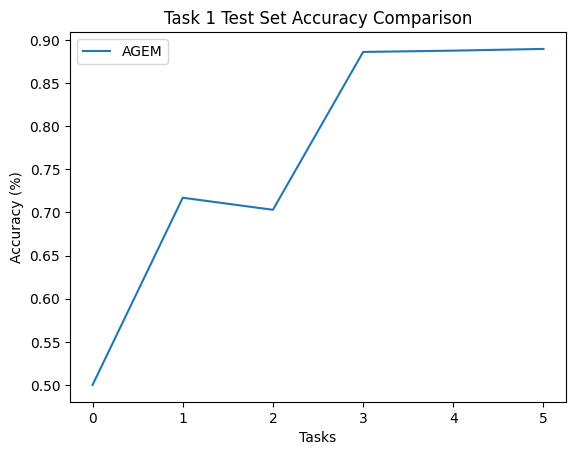

In [6]:
%cd Unlearning
import  unlearnGEM.unlearns as unlearns
%cd ../
from collections import OrderedDict

test_accuracies_AGEM_all = []
# gems.AGEM = True
# gems.CURR_TASK = 1
newmodels = [None]*(n_tasks+1)
newmodels[0] = model

# Run each task seperately and store the test accuracies for each task
for i in range(1, n_tasks+1):
    if i % 3 == 0:
        # Identify classes for the most recently learned task
        task_start = (i - 1) * gems.SIZE_OF_TASKS
        task_end = task_start + gems.SIZE_OF_TASKS
        classes_to_unlearn = gems.SHUFFLEDCLASSES[task_start:task_end]
        # Convert class names to numeric labels
        oldClasstoNewClass = {}
        for idx, class_name in enumerate(gems.CLASSES):  # Use CLASSES for original mapping
            oldClasstoNewClass[idx] = gems.SHUFFLEDCLASSES.index(class_name)

        # Convert classes_to_unlearn from class names to numeric labels
        classes_to_unlearn = [oldClasstoNewClass[gems.CLASSES.index(class_name)] for class_name in classes_to_unlearn]

        train_data_tensor = torch.tensor(train_data, dtype=torch.float32).cuda()
        train_labels_tensor = torch.tensor(train_labels).cuda()

        test_data_tensor = torch.tensor(test_data, dtype=torch.float32).cuda()
        test_labels_tensor = torch.tensor(test_labels).cuda()
        
        # Split training data into forget and retain sets
        forget_mask = torch.isin(train_labels_tensor, torch.tensor(classes_to_unlearn).cuda())
        retain_mask = ~forget_mask

        # Get the indices of the forget and retain subsets
        forget_indices = forget_mask.nonzero(as_tuple=True)[0]
        retain_indices = retain_mask.nonzero(as_tuple=True)[0]

        # Create the forget and retain datasets using the indices
        forget_dataset = TensorDataset(train_data_tensor[forget_indices], train_labels_tensor[forget_indices])
        retain_dataset = TensorDataset(train_data_tensor[retain_indices], train_labels_tensor[retain_indices])
        test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)

        # Create DataLoaders
        data_loaders = OrderedDict(
            forget = DataLoader(forget_dataset, batch_size=64, shuffle=True),
            retain = DataLoader(retain_dataset, batch_size=64, shuffle=True),
            test =  DataLoader(test_dataset, batch_size=64, shuffle=False)
        )
        args = unlearns.Args()
        newmodels[i-1] = unlearns.unlearn_wrapper(data_loaders, deepcopy(newmodels[i-1]), args)
    newmodels[i], test_accuracies_AGEM = gems.train_next_task(gems.Args(), deepcopy(newmodels[i-1]), i)

    test_accuracies_AGEM_all.extend(test_accuracies_AGEM)

# Plot the test accuracies for Task 1 only after each iteration.
task_1_accuracies_AGEM = []
task_1_accuracies_AGEM.append(0.5)
for i in range(0, len(test_accuracies_AGEM_all), n_tasks):
    task_1_accuracies_AGEM.append(test_accuracies_AGEM_all[i])

plt.plot(task_1_accuracies_AGEM, label='AGEM')
plt.title('Task 1 Test Set Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Tasks')
plt.legend()
plt.show()

In [7]:
import csv

# Specify the file name
output_file = "original_results.csv"

# Open the file in write mode (create or overwrite)
with open(output_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(["Iteration", "Class", "Accuracy (%)"])
    
    # Loop through each model
    for i in range(len(models)):
        models[i].eval()
        class_correct = [0] * 10
        class_total = [0] * 10
        
        with torch.no_grad():
            for inputs, labels in data_loaders["test"]:
                outputs = models[i](inputs)
                _, predicted = torch.max(outputs.data, 1)

                # Update total and correct counts for each class
                for label, prediction in zip(labels, predicted):
                    class_total[label.item()] += 1
                    if label.item() == prediction.item():
                        class_correct[label.item()] += 1
        
        # Write accuracy for each class to the file
        for class_idx in range(10):
            if class_total[class_idx] > 0:
                class_accuracy = 100 * class_correct[class_idx] / class_total[class_idx]
            else:
                class_accuracy = 0  # No samples for this class
            
            # Write row to file
            writer.writerow([i, class_idx, class_accuracy])

        models[i].train()

print(f"Results saved to {output_file}")

Results saved to original_results.csv


In [8]:
import csv

# Specify the file name
output_file = "mixed_results.csv"

# Open the file in write mode (create or overwrite)
with open(output_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(["Iteration", "Class", "Accuracy (%)"])
    
    # Loop through each model
    for i in range(len(models)):
        newmodels[i].eval()
        class_correct = [0] * 10
        class_total = [0] * 10
        
        with torch.no_grad():
            for inputs, labels in data_loaders["test"]:
                outputs = newmodels[i](inputs)
                _, predicted = torch.max(outputs.data, 1)

                # Update total and correct counts for each class
                for label, prediction in zip(labels, predicted):
                    class_total[label.item()] += 1
                    if label.item() == prediction.item():
                        class_correct[label.item()] += 1
        
        # Write accuracy for each class to the file
        for class_idx in range(10):
            if class_total[class_idx] > 0:
                class_accuracy = 100 * class_correct[class_idx] / class_total[class_idx]
            else:
                class_accuracy = 0  # No samples for this class
            
            # Write row to file
            writer.writerow([i, class_idx, class_accuracy])

        newmodels[i].train()

print(f"Results saved to {output_file}")

Results saved to mixed_results.csv


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define file paths
learning_file = "original_results.csv"
unlearning_file = "mixed_results.csv"

# Load data from files
learning_df = pd.read_csv(learning_file)
unlearning_df = pd.read_csv(unlearning_file)

# Group data by iteration and class
learning_grouped = learning_df.groupby(["Iteration", "Class"]).mean()
unlearning_grouped = unlearning_df.groupby(["Iteration", "Class"]).mean()

# Define number of classes
num_classes = len(learning_df["Class"].unique())

# Create plots for each class
for class_idx in range(num_classes):
    plt.figure(figsize=(10, 6))
    
    # Extract accuracy data for the current class
    learning_class = learning_grouped.loc[(slice(None), class_idx), "Accuracy (%)"]
    unlearning_class = unlearning_grouped.loc[(slice(None), class_idx), "Accuracy (%)"]
    
    # Plot accuracy across iterations
    plt.plot(
        learning_class.index.get_level_values(0),
        learning_class.values,
        label="Learning Only",
        marker="o"
    )
    plt.plot(
        unlearning_class.index.get_level_values(0),
        unlearning_class.values,
        label="With Unlearning",
        marker="x"
    )
    
    # Add plot details
    plt.title(f"Class {class_idx} Accuracy Across Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid()
    # plt.savefig(f"class_{class_idx}_accuracy_comparison.png")  # Save the plot for each class
    plt.show()